# Matplotlib

- [ In Iris Dataset, plot a scatter plot differentiating each classifier with a boundary.](#question1)

- [ In wine quality dataset, plot a correlation matrix for all numerical variables and find out which columns are highly correlated to each other.](#question2)

- [ Plot subplots for categorical features in titanic dataset , consisting of rows = 3 and columns = 2 format.](#question3)

- [ In the diabetes dataset, visualize the numerical variables using histogram and make use of subplots while plotting.](#question4)

- [ Plot an roc curve depicting the True Positive Rate(TPR) and False Positive Rate(FPR) in Diabetes dataset.](#question5)

- [ In the breast cancer dataset, visualize the malignant and benign diagnosis.](#question6)

- [ In the same breast cancer dataset, plot the columns 'radius_mean', 'texture_mean' along with the col 'perimeter_mean'.](#question7)

- [ In the diabetes dataset , plot the confusion matrix along with the ROC Curve using subplot.](#question8)

- [ In Boston housing dataset, plot scatter of 'LSTAT' Vs 'MEDV', 'INDUS' Vs 'MEDV' and 'TAX' and 'MEDV'.](#question9)

- [ In the diabetes dataset, plot a pie-chart showing % of diabetes and % of non-diabetes.](#question10)

In [1]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np


from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer


import matplotlib.pyplot as plt
%matplotlib inline

<a id='question1'></a>
       
#### In Iris Dataset, plot a scatter plot differentiating each classifier with a boundary.

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [3]:
#add code here
plt.show()

<a id='question2'></a>
#### In wine quality dataset, plot a correlation matrix for all numerical variables and find out which columns are highly correlated to each other.

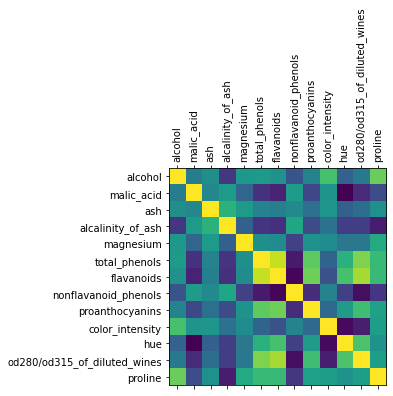

In [4]:
from matplotlib import ticker

wine = load_wine()
wine_df = pd.DataFrame(wine['data'],columns=wine['feature_names'])
# wine_df['target'] = wine['target']

corr =wine_df.corr()


fig,ax = plt.subplots()

ax.matshow(corr)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

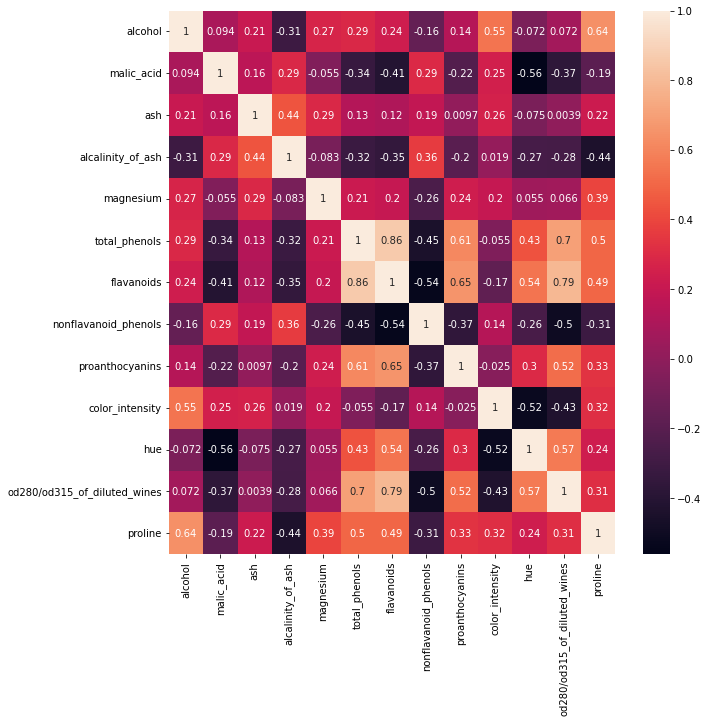

In [5]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

####  Lighter the color, they are more positively correlated 
#### Darker the color, they are more negatively correlated 
* From above plot, we can say that the following features are highly correlated (>+0.5 or <-0.5):

    * alcohol and color_intensity
    * alcohol and proline
    * malic acid and hue
    * total_phenols and flavanoids
    * total_phenols and proanthocyanins
    * total_phenols and diluted_wines
    * total_phenols and proline
    * flavanoids and nonflavanoid_phenols
    * flavanoids and proanthocyanins
    * flavanoids and hue
    * flavanoids and proline
    * nonflavanoid_phenols and diluted_wines
    * proanthocyanins and diluted_wines
    * color_intensity and hue
    * hue and diluted_wines

<a id='question3'></a>
#### Plot subplots for categorical features in titanic dataset , consisting of rows = 3 and columns = 2 format.

In [6]:
titanic = pd.read_csv("../../datasets/titanic.csv")
titanic.head()
titanic =titanic.dropna()

categorical = titanic.select_dtypes(include='object').columns

<Figure size 2160x1440 with 0 Axes>

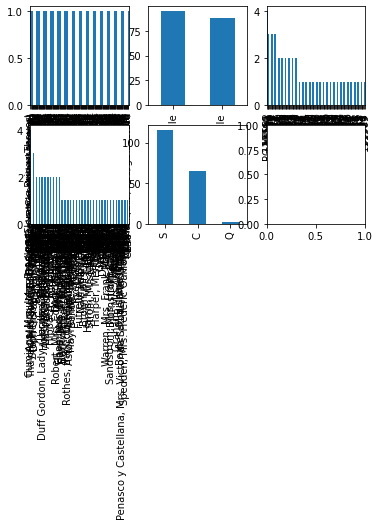

In [7]:
#make necessary changes

fig =plt.figure(figsize=(30,20))

fig, axes = plt.subplots(2,3)

length =len(categorical)

for idx in range(length):
    
    x=int(idx/3)
    y=idx%3

    plt.sca(axes[x,y])
    titanic[categorical[idx]].value_counts().plot(kind='bar')
plt.show()

<a id='question4'></a>
#### In the diabetes dataset, visualize the numerical variables using histogram and make use of subplots while plotting.

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


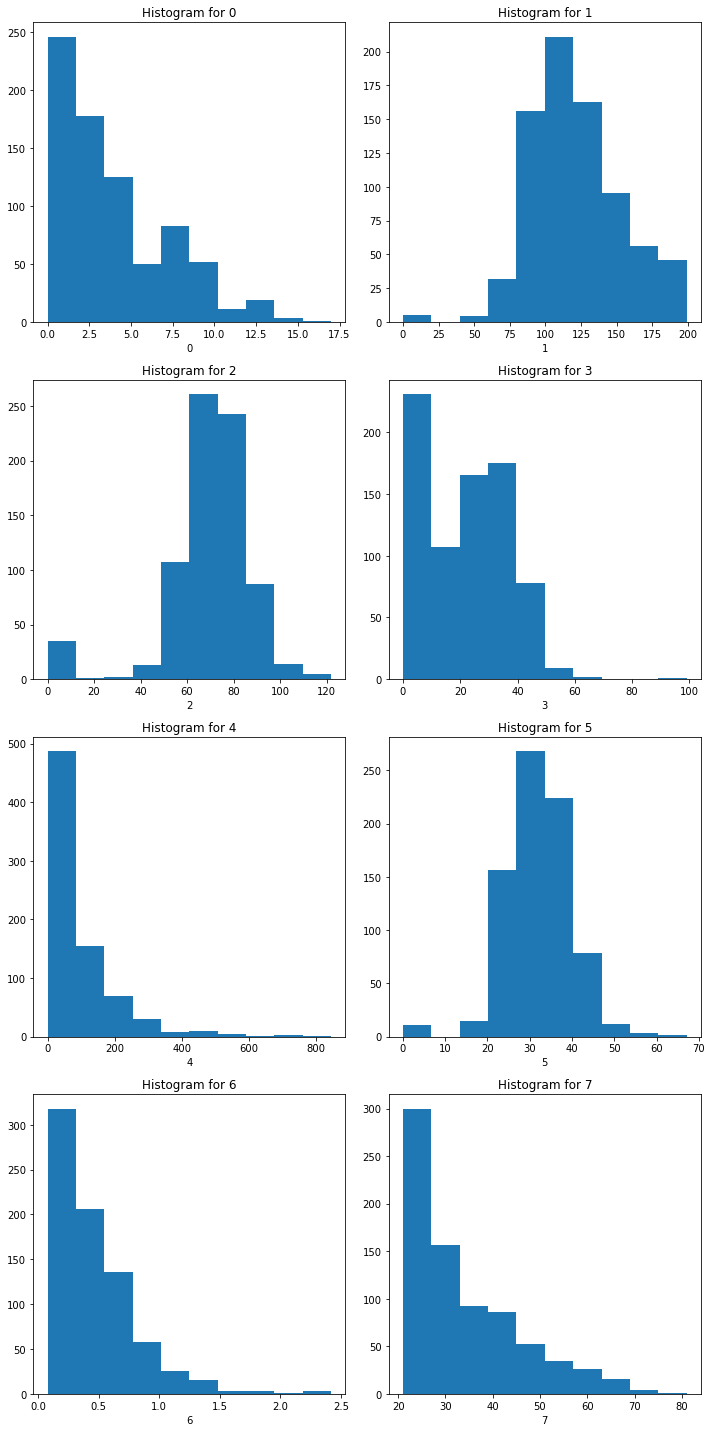

In [8]:
diabetes = pd.read_csv('../../datasets/diabetes.csv',header=None)
print(diabetes.head())



fig, axes = plt.subplots(4,2, figsize=(10,20))

numeric_features = diabetes.select_dtypes(include=['int64','float64']).columns

length = len(numeric_features)-1#last_column is categorical(diabetes/not)
for idx in range(length):
    
    x = int(idx/2)
    y = int(idx%2)
    axes[x,y].hist(diabetes[numeric_features[idx]])
    axes[x,y].set_xlabel(numeric_features[idx])
    axes[x,y].set_title("Histogram for {}".format(numeric_features[idx]), loc='center')
    
plt.tight_layout()
plt.show()

<a id='question5'></a>
#### Plot an roc curve depicting the True Positive Rate(TPR) and False Positive Rate(FPR) in Diabetes dataset.

In [9]:
#add code here

<a id='question6'></a>
#### In the breast cancer dataset, visualize the malignant and benign diagnosis.

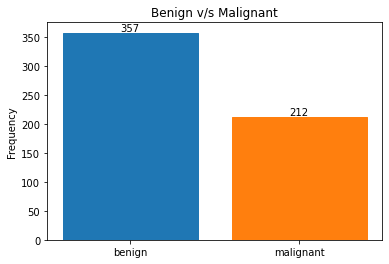

In [10]:
breast_cancer = load_breast_cancer()
target = breast_cancer['target']
target_names = breast_cancer['target_names']
target =np.where(target==0, target_names[0], target_names[1])

unique, counts =np.unique(target, return_counts=True)

plt.figure()
graph = plt.bar(unique, counts)
for i,p in enumerate(graph.patches):
    height=p.get_height()
    p.set_color('C'+str(i))
    plt.text(p.get_x()+p.get_width()/2, height+3, counts[i], ha='center')
plt.ylabel('Frequency')
plt.title("Benign v/s Malignant")
plt.show()


<a id='question7'></a>
#### In the same breast cancer dataset, plot the columns 'radius_mean', 'texture_mean' along with the col 'perimeter_mean'.

Selected features: Index(['mean radius', 'mean texture', 'mean perimeter'], dtype='object')


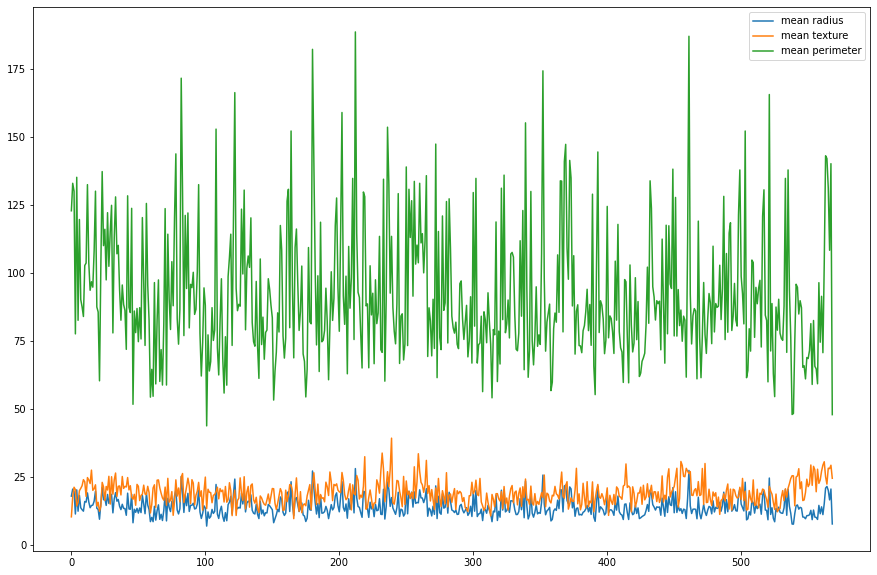

In [11]:
breast_cancer_df = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
breast_cancer_df.head()
features = breast_cancer_df.columns[:3]
print("Selected features:",features)

fig = plt.figure(figsize=(15,10))
for feature in features:
    plt.plot(breast_cancer_df[feature],label=feature)
plt.legend()
plt.show()

<a id='question8'></a>
#### In the diabetes dataset , plot the confusion matrix along with the ROC Curve using subplot.

In [12]:
# train logistic_regression and plot the metrics
# add code here

<a id='question9'></a>
#### In Boston housing dataset, plot scatter of 'LSTAT' Vs 'MEDV', 'INDUS' Vs 'MEDV' and 'TAX' and 'MEDV'.

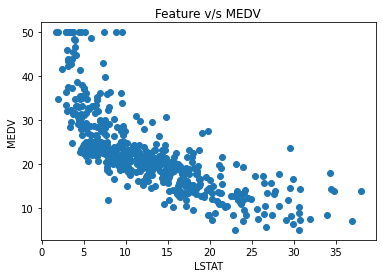

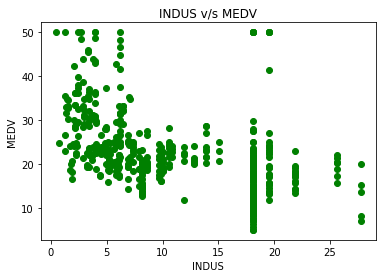

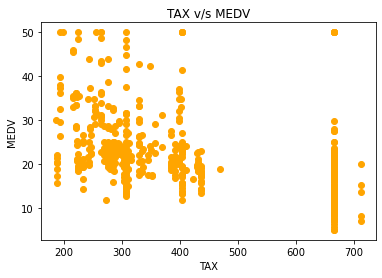

In [13]:
boston =load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])



plt.scatter(boston_df['LSTAT'], boston['target'],label='LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Feature v/s MEDV')
plt.show()


plt.scatter(boston_df['INDUS'], boston['target'],label='INDUS', color='green')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.title('INDUS v/s MEDV')
plt.show()


plt.scatter(boston_df['TAX'], boston['target'],label='TAX', color='orange')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.title('TAX v/s MEDV')
plt.show()

<a id='question10'></a>
#### In the diabetes dataset, plot a pie-chart showing % of diabetes and % of non-diabetes.

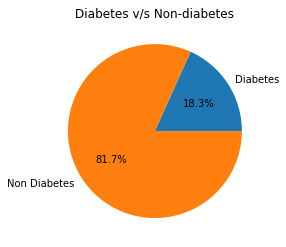

In [14]:
target = diabetes[8]
target = np.where(diabetes==0, 'Diabetes', 'Non Diabetes')

unique, value_counts = np.unique(target, return_counts=True)

plt.pie(value_counts, labels=unique, autopct='%1.1f%%')
plt.title("Diabetes v/s Non-diabetes")
plt.show()